# Классификация с помощью логистической регрессии

В этом ноутбуке мы реализуем и визуализируем работу логистической регрессии.

Мы рассмотрим:
1. Подготовку данных
2. Визуализацию данных
3. Реализацию алгоритма логистической регрессии
4. Обучение модели
5. Визуализацию процесса обучения
6. Сравнение с реализацией из scikit-learn

In [1]:
# Импорт необходимых библиотек
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Импорт наших собственных функций
from models.logistic_regression_algorithm import logistic_regression_algorithm
from utils.reporting import print_weights

from utils.plot_points import plot_points
from utils.plot_classifier_and_learning_history import plot_classifier, plot_learning_history
from utils.plot_errors import plot_errors

## 0. Обзор сигмоидной функции

In [2]:
def sigmoid(x):
    # другая форма записи: 
    # np.exp(x) / (1 + np.exp(x))
    
    s = 1 / (1 + np.exp(-x) )
    
    return round(s, 4) 


df = pd.DataFrame({
    "x": [-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 
          0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "sigma": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Применяем сигмоидную функцию к столбцу 'x' и записываем результат в 'sigma'
df['sigma'] = df['x'].apply(sigmoid)
df

,x,sigma
0,-11,0.0000
1,-10,0.0000
2,-9,0.0001
3,-8,0.0003
4,-7,0.0009
5,-6,0.0025
6,-5,0.0067
7,-4,0.0180
8,-3,0.0474
9,-2,0.1192


## 1. Подготовка данных

Создадим простой набор данных для бинарной классификации.

Каждый объект описывается двумя признаками: 
- "Аак"
- "Бип".

Метка класса: 
- 0 (Грустный)
- 1 (Радостный).

In [3]:
# Создаем массив признаков и меток
features = np.array([[1, 0], [0, 2], [1, 1], [1, 2],
                    [1, 3], [2, 2], [2, 3], [3, 2]])
labels = np.array([0, 0, 0, 0, 1, 1, 1, 1])


# Создаем DataFrame для удобного отображения данных
data = pd.DataFrame(features, columns=['Аак', 'Бип'])
data['Радостный / Грустный'] = labels
data

,Аак,Бип,Радостный / Грустный
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1
5,2,2,1
6,2,3,1
7,3,2,1


## 2. Визуализация данных

Построим график, чтобы увидеть распределение наших данных в пространстве признаков.

In [4]:
# Установим параметры для графиков
figsize = (12, 4)
xlim=(-1, 4)
ylim=(-1, 4)

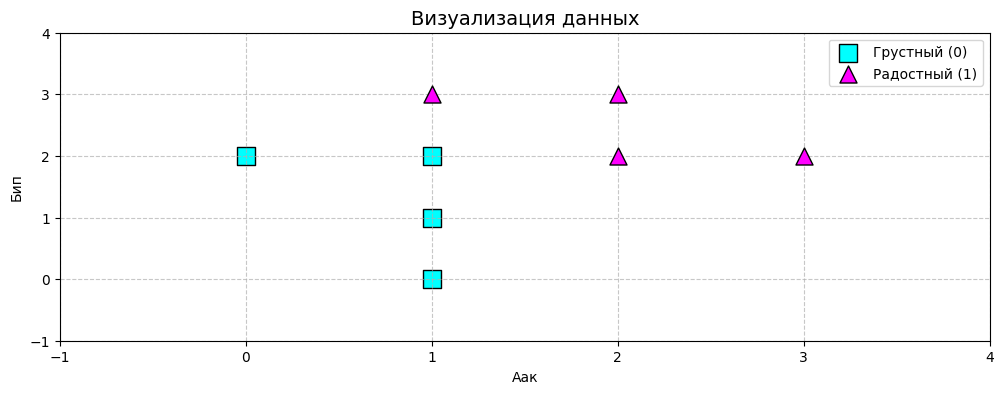

In [5]:
# Создаем график
plt.figure(figsize=figsize)

plot_points(features, labels, 
            point_size=150,
            class_names=('Грустный (0)', 'Радостный (1)'), 
            xlabel='Аак', ylabel='Бип',
            xlim=xlim,
            ylim=ylim)

# Настраиваем график
plt.title('Визуализация данных', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## 3. Обучение логистической регрессии

Обучим нашу собственную реализацию логистической регрессии на подготовленных данных.

In [6]:
# Запускаем алгоритм линейной регрессии
training_history = logistic_regression_algorithm(features, labels, epochs=5000)

# Выводим итоговые веса модели
feature_names = data.columns[:-1]
print_weights(training_history['final_weights'], 
              training_history['final_bias'], 
              feature_names, 
              decision=2)

Вес «аак»:	 1.71
Вес «бип»:	 1.12
Смещение:	-3.99


## 4. Визуализация работы классификатора

Построим график, показывающий как логистическая регрессия разделяет пространство признаков.

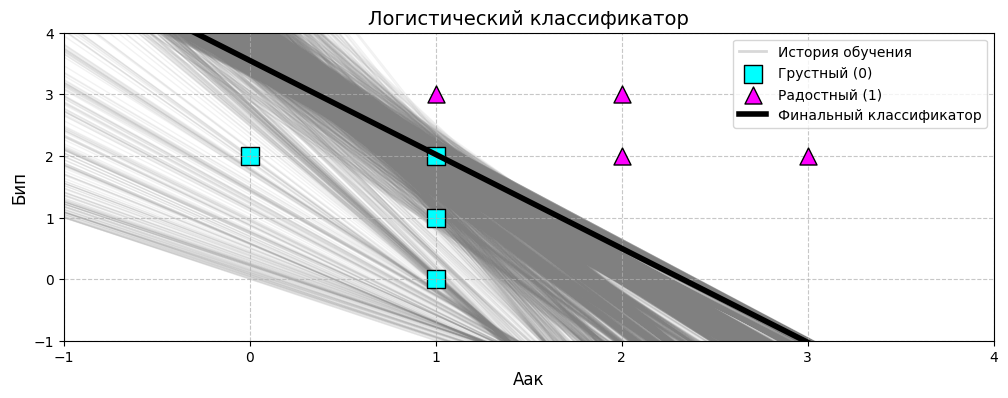

In [7]:
# Рисуем классификатор
plt.figure(figsize=figsize)
plot_classifier(training_history['final_weights'], 
                training_history['final_bias'], 
                features, 
                labels,
                weights_history=training_history['weights_history'],
                bias_history=training_history['bias_history'],
                point_size=150,
                class_names=('Грустный (0)', 'Радостный (1)'), 
                xlabel='Аак', 
                ylabel='Бип',
                xlim=xlim,
                ylim=ylim)

# Настраиваем график
plt.xlabel('Аак', fontsize=12)
plt.ylabel('Бип', fontsize=12)
plt.title('Логистический классификатор', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## 5. Анализ процесса обучения

Построим график изменения ошибки в процессе обучения.

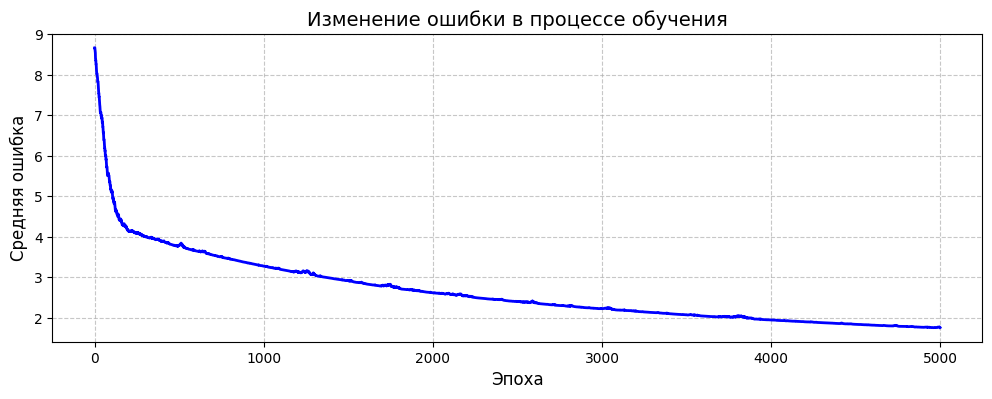

In [8]:
# Рисуем график ошибок
plt.figure(figsize=figsize)
plot_errors(training_history['errors_history'], 'MAE')

plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('Средняя ошибка', fontsize=12)
plt.title('Изменение ошибки в процессе обучения', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 6. Сравнение с реализацией из scikit-learn

Для проверки обучим стандартную логистическую регрессию из библиотеки scikit-learn.

In [9]:
# Создаем и обучаем логистическую регрессию из scikit-learn
logistic_regression = LogisticRegression()
logistic_regression.fit(features, labels)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
# Делаем предсказания
predictions_lr = logistic_regression.predict(features)
print("Предсказания логистической регрессии:", predictions_lr)

Предсказания логистической регрессии: [0 0 0 0 1 1 1 1]


In [11]:
# Выводим параметры модели
coefficients_lr = logistic_regression.coef_[0]
intercept_lr = logistic_regression.intercept_[0]

print("\nКоэффициенты (веса) логистической регрессии:", coefficients_lr)
print("Смещение (bias) логистической регрессии:", intercept_lr)


Коэффициенты (веса) логистической регрессии: [1.00465774 0.93711261]
Смещение (bias) логистической регрессии: -3.159837995647939


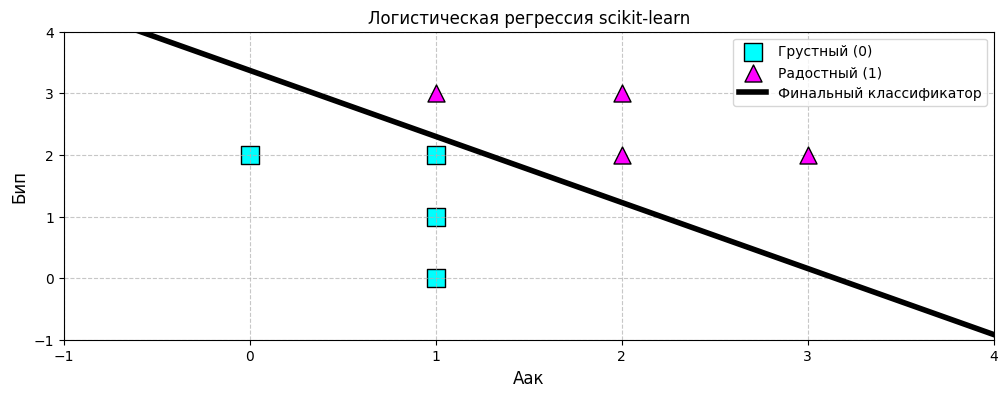

In [12]:
# Визуализируем результат
plt.figure(figsize=figsize)

# Рисуем классификатор scikit-learn
plot_classifier(weights=coefficients_lr, bias=intercept_lr, features=features, labels=labels,
    point_size=150, class_names=('Грустный (0)', 'Радостный (1)'),
    xlabel='Аак', ylabel='Бип', xlim=xlim, ylim=ylim
)

# Добавляем легенду и заголовок
plt.legend(loc='best')
plt.title('Логистическая регрессия scikit-learn')
plt.xlabel('Аак', fontsize=12)
plt.ylabel('Бип', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()